# Thinh Nguyen
# Dr Olenick
# Comp Phys Exam 2
# 24-10-2022

Q1.


In [6]:

from math import *
from scipy.optimize import newton


def f(r):
    return (((2.662e-6)**2)*(r**5))-(2*((2.662e-6)**2)*(r**4)*3.844e8)+(((2.662e-6)**2)*(r**3)*((3.844e8)**2))-((6.674e-11)*5.974e24*(r**2))+(6.674e-11*7.348e22*(r**2))+(2*(6.674e-11)*(5.974e24)*(3.844e8)*r)-((6.674e-11)*(5.974e24)*((3.844e8)**2))


r = (2/3)*3.844e8

print('distance r from earth to L1 = {:.4f} m'.format(newton(f, r)))
print("r/R= "+str(newton(f,r)/3.844e8)+" %")


distance r from earth to L1 = 326045071.6654 m
r/R= 0.8481921739473348 %


Q3.

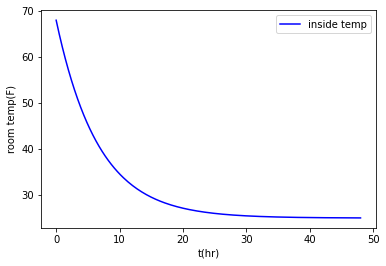

In [17]:
#48 hours graph
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------
#when outside is 25F
def R(T,t):
        return -r*(T - 25)
#------------------------------------
r = 0.15 #cooling rate in Farenheit/hr

#define numtime as length of time for calc
numtime = 200
t = np.linspace(0,48, numtime) #time to calculate
T = np.zeros(numtime)

T[0] = 68 #init temp
h = t[1] - t[0]


#apply Heun's method
for i in range(1, numtime):
    t_now = t[i-1]
    Tend = T[i-1] + R(T[i-1],t_now)*h #use Euler to find this point    
    T[i] = T[i-1] + (R(T[i-1],t_now)+ R(Tend,t_now))/2 * h #taking the avg / h

   
plt.xlabel('t(hr)')
plt.ylabel('room temp(F)')
plt.plot(t, T, 'b-', label = 'inside temp')
plt.legend()
plt.show()


It takes 12 hours for the interior temperature to fall to 32F


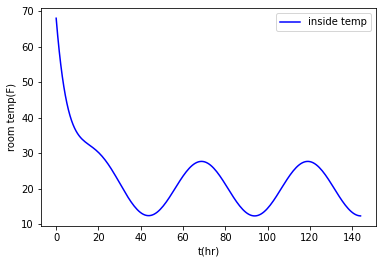

In [18]:
#6 days = 144 hours
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------
#when outside is 25F
def R(T,t):
        return -r*(T - (20*(1 + 0.5*np.sin(t/8))))
#------------------------------------
r = 0.15 #cooling rate in Farenheit/hr

#define numtime as length of time for calc
numtime = 200
t = np.linspace(0,144, numtime) #time
T = np.zeros(numtime)

T[0] = 68 #init temp
h = t[1] - t[0]


#apply Heun's method
for i in range(1, numtime):
    t_now = t[i-1]
    Tend = T[i-1] + R(T[i-1],t_now)*h #use Euler to find this point    
    T[i] = T[i-1] + (R(T[i-1],t_now)+ R(Tend,t_now))/2 * h #taking the avg / h

   
plt.xlabel('t(hr)')
plt.ylabel('room temp(F)')
plt.plot(t, T, 'b-', label = 'inside temp')
plt.legend()
plt.show()


It takes 18 hours to reach 32F

Q4.



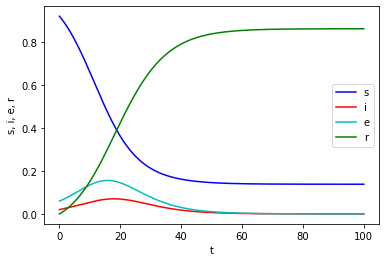

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------
#derivative rs
def rs(s,i):
    return -B*i*s
#------------------------------------

#------------------------------------
#derivative re
def re(s, i, e):
    return (B*i*s) - (sigma*e)
#------------------------------------

#------------------------------------
#derivative re
def ri(e, i):
    return (sigma*e)-(y*i)
#------------------------------------

#------------------------------------
#derivative rr
def rr(i):
    return y*i
#------------------------------------
#define numtime as length of time for calc
numtime = 1000
t = np.linspace(0,100,numtime) #0 to 100 days
s = np.zeros(numtime)
i = np.zeros(numtime)
e = np.zeros(numtime)
r = np.zeros(numtime)
r[0] = 0
h = t[1] - t[0]
s[0] = 0.92
e[0] = 0.06
i[0] = 0.02
sigma = 1/5.2
y = 1/2.3
B = 2.2*y
#apply Heun's method
for j in range(1, numtime):
    Send = s[j-1] + rs(s[j-1],i[j-1])*h #use Euler to find this point    
    Iend = i[j-1] + ri(i[j-1],e[j-1])*h #use Euler to find this point  
    Eend = e[j-1] + re(s[j-1],i[j-1],e[j-1])*h #use Euler to find this point  
    Rend = r[j-1] + rr(i[j-1])*h
    s[j] = s[j-1] + (rs(s[j-1],i[j-1]) + rs(Send,Iend))/2 * h #taking the avg / h
    i[j] = i[j-1] + (ri(e[j-1],i[j-1])+ ri(Eend,Iend))/2 * h #taking the avg / h
    e[j] = e[j-1] + (re(s[j-1],i[j-1],e[j-1])+ re(Send,Iend,Eend))/2 * h #taking the avg / h
    r[j] = r[j-1] + (rr(i[j-1])+ rr(Iend))/2 * h #taking the avg / h
   
plt.xlabel('t')
plt.ylabel('s, i, e, r')
plt.plot(t, s, 'b-', label = 's')
plt.plot(t, i, 'r-', label = 'i')
plt.plot(t, e, 'c-', label = 'e')
plt.plot(t, r, 'g-', label = 'r')
plt.legend()
plt.show()

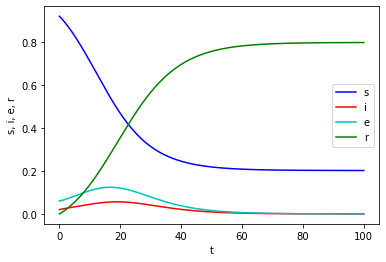

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------
#derivative rs
def rs(s,i):
    return -B*i*s
#------------------------------------

#------------------------------------
#derivative re
def re(s, i, e):
    return (B*i*s) - (sigma*e)
#------------------------------------

#------------------------------------
#derivative re
def ri(e, i):
    return (sigma*e)-(y*i)
#------------------------------------

#------------------------------------
#derivative rr
def rr(i):
    return y*i
#------------------------------------
#define numtime as length of time for calc
numtime = 1000
t = np.linspace(0,100,numtime) #0 to 100 days
s = np.zeros(numtime)
i = np.zeros(numtime)
e = np.zeros(numtime)
r = np.zeros(numtime)
r[0] = 0
h = t[1] - t[0]
s[0] = 0.92
e[0] = 0.06
i[0] = 0.02
sigma = 1/5.2
y = 1/2.3
B = 1.9*y
#apply Heun's method
for j in range(1, numtime):
    Send = s[j-1] + rs(s[j-1],i[j-1])*h #use Euler to find this point    
    Iend = i[j-1] + ri(i[j-1],e[j-1])*h #use Euler to find this point  
    Eend = e[j-1] + re(s[j-1],i[j-1],e[j-1])*h #use Euler to find this point  
    Rend = r[j-1] + rr(i[j-1])*h
    s[j] = s[j-1] + (rs(s[j-1],i[j-1]) + rs(Send,Iend))/2 * h #taking the avg / h
    i[j] = i[j-1] + (ri(e[j-1],i[j-1])+ ri(Eend,Iend))/2 * h #taking the avg / h
    e[j] = e[j-1] + (re(s[j-1],i[j-1],e[j-1])+ re(Send,Iend,Eend))/2 * h #taking the avg / h
    r[j] = r[j-1] + (rr(i[j-1])+ rr(Iend))/2 * h #taking the avg / h
   
plt.xlabel('t')
plt.ylabel('s, i, e, r')
plt.plot(t, s, 'b-', label = 's')
plt.plot(t, i, 'r-', label = 'i')
plt.plot(t, e, 'c-', label = 'e')
plt.plot(t, r, 'g-', label = 'r')
plt.legend()
plt.show()

Lower the B value to 1.9 * gamma from 2.2 * gamma makes the graph of s decreases less   

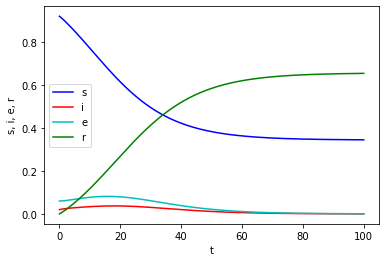

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#------------------------------------
#derivative rs
def rs(s,i):
    return -B*i*s
#------------------------------------

#------------------------------------
#derivative re
def re(s, i, e):
    return (B*i*s) - (sigma*e)
#------------------------------------

#------------------------------------
#derivative re
def ri(e, i):
    return (sigma*e)-(y*i)
#------------------------------------

#------------------------------------
#derivative rr
def rr(i):
    return y*i
#------------------------------------
#define numtime as length of time for calc
numtime = 1000
t = np.linspace(0,100,numtime) #0 to 100 days
s = np.zeros(numtime)
i = np.zeros(numtime)
e = np.zeros(numtime)
r = np.zeros(numtime)
r[0] = 0
h = t[1] - t[0]
s[0] = 0.92
e[0] = 0.06
i[0] = 0.02
sigma = 1/5.2
y = 1/2.3
B = 1.5*y
#apply Heun's method
for j in range(1, numtime):
    Send = s[j-1] + rs(s[j-1],i[j-1])*h #use Euler to find this point    
    Iend = i[j-1] + ri(i[j-1],e[j-1])*h #use Euler to find this point  
    Eend = e[j-1] + re(s[j-1],i[j-1],e[j-1])*h #use Euler to find this point  
    Rend = r[j-1] + rr(i[j-1])*h
    s[j] = s[j-1] + (rs(s[j-1],i[j-1]) + rs(Send,Iend))/2 * h #taking the avg / h
    i[j] = i[j-1] + (ri(e[j-1],i[j-1])+ ri(Eend,Iend))/2 * h #taking the avg / h
    e[j] = e[j-1] + (re(s[j-1],i[j-1],e[j-1])+ re(Send,Iend,Eend))/2 * h #taking the avg / h
    r[j] = r[j-1] + (rr(i[j-1])+ rr(Iend))/2 * h #taking the avg / h
   
plt.xlabel('t')
plt.ylabel('s, i, e, r')
plt.plot(t, s, 'b-', label = 's')
plt.plot(t, i, 'r-', label = 'i')
plt.plot(t, e, 'c-', label = 'e')
plt.plot(t, r, 'g-', label = 'r')
plt.legend()
plt.show()

Lowering the value of B to 1.5 * gamma from 2.2 * gamma makes the graph of s decreases even lesser

The lower the value of Beta, the graph of the susceptible population increases

Q2. 

fitted gaussian function coefficients: 
[ 3.22800507  8.40937476  5.32096019  7.03909497 39.26579548 64.3523226 ]
covariance of coefficients: 
[ 8.46848432e-02  6.75183984e+06  3.73746773e-03  5.65168365e+06
  1.81217976e-04 -1.28212221e-02]


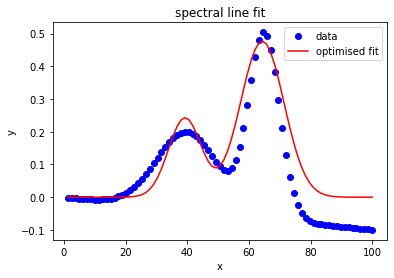

In [32]:
#2.
#curve fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
data= np.loadtxt("E2 Prob2.txt", skiprows=1)
x = data[:,0]
y = data[:,1]

def fit(x, A, B, sigma1, sigma2, x1, x2):
    return A/(sigma1*np.sqrt(2*np.pi))* np.exp((-(x-x1)**2)/(2*(sigma1**2))) + B/(sigma2*np.sqrt(2*np.pi))*np.exp((-(x-x2)**2)/(2*(sigma1**2)))

p0=[0.12, 0.42, 25, 20, 41, 65]
   
param, param_cov = curve_fit(fit, x, y,p0, maxfev=5000)
print('fitted gaussian function coefficients: ')
print(param)
print('covariance of coefficients: ')
print(param_cov[0])
#plot the data and fitted curve
fitted = param[0]/(param[2]*np.sqrt(2*np.pi))*np.exp((-(x-param[4])**2)/(2*(param[2]**2))) + param[1]/(param[3]*np.sqrt(2*np.pi))*np.exp((-(x-param[5])**2)/(2*(param[3]**2)))
plt.title('spectral line fit')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'o', color='b', label='data')
plt.plot(x, fitted, '-', color='r', label='optimised fit')
plt.legend()
plt.show()

The slope is -0.001* x

fitted gaussian function coefficients: 
[ 4.39085521  9.05987766  6.24570713  6.93223855 39.15740886 64.43784744]
covariance of coefficients: 
[ 3.03319226e-02 -1.72887977e+05  5.74808978e-03 -1.32286510e+05
 -2.11479429e-03  2.33543929e-03]


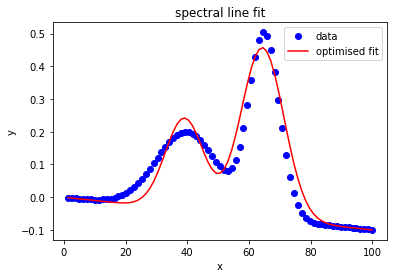

In [35]:
#2.
#curve fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
data= np.loadtxt("E2 Prob2.txt", skiprows=1)
x = data[:,0]
y = data[:,1]

def fit(x, A, B, sigma1, sigma2, x1, x2):
    return A/(sigma1*np.sqrt(2*np.pi))* np.exp((-(x-x1)**2)/(2*(sigma1**2))) + B/(sigma2*np.sqrt(2*np.pi))*np.exp((-(x-x2)**2)/(2*(sigma1**2))) + (-0.001*x)

p0=[0.12, 0.42, 25, 20, 41, 65]
   
param, param_cov = curve_fit(fit, x, y,p0, maxfev=5000)
print('fitted gaussian function coefficients: ')
print(param)
print('covariance of coefficients: ')
print(param_cov[0])
#plot the data and fitted curve
fitted = param[0]/(param[2]*np.sqrt(2*np.pi))*np.exp((-(x-param[4])**2)/(2*(param[2]**2))) + param[1]/(param[3]*np.sqrt(2*np.pi))*np.exp((-(x-param[5])**2)/(2*(param[3]**2))) + (-0.001*x)
plt.title('spectral line fit')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'o', color='b', label='data')
plt.plot(x, fitted, '-', color='r', label='optimised fit')
plt.legend()
plt.show()